<a href="https://colab.research.google.com/github/ferngndo/remote-sensing/blob/main/Abrindo_Image_GEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geemap -q
!pip install geopandas -q

In [2]:
import ee
import geemap
import geopandas as gpd
import numpy as np
import json

In [3]:
ee.Authenticate()
ee.Initialize(project='ee-fernandogomesgeo')

<Axes: >

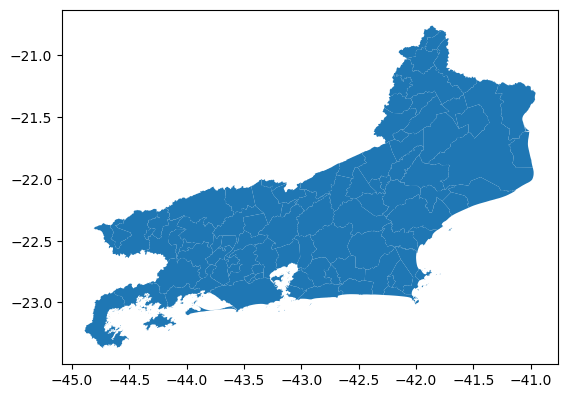

In [4]:
rj = gpd.read_file('/content/RJ_Municipios_2022.shp')
rj.plot()

In [5]:
gdf = rj[rj['NM_MUN']=='Araruama']
gdf

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
2,3300209,Araruama,RJ,638.276,"POLYGON ((-42.28399 -22.93928, -42.28444 -22.9..."


<Axes: >

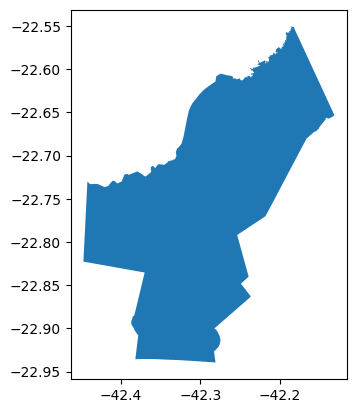

In [6]:
gdf.plot()

In [ ]:
shp_json = gdf.to_json()
roi = json.loads(shp_json)
roi = roi['features']
roi

In [8]:
region = ee.FeatureCollection(roi)


Map = geemap.Map()
Map.centerObject(region,10)
Map.add_basemap('HYBRID')
contorno = ee.Image().paint(region, 0, 2)
Map.addLayer(contorno,{}, 'ROI')

display(Map)

Map(center=[-22.755302204539007, -42.29285576570886], controls=(WidgetControl(options=['position', 'transparen…

In [29]:
Sentinel = ee.ImageCollection('COPERNICUS/S2_SR')\
         .filterBounds(ee.Geometry.Point([-42.333776, -22.821800]))\
         .filterDate('2023-01-01', '2024-01-01')\
         .sort('CLOUDY_PIXEL_PERCENTAGE')\
         .first()

In [30]:
Sentinel

In [31]:
Map.centerObject(region,10)
Map.add_ee_layer(Sentinel, {'bands': ['B4', 'B3', 'B2'], 'min': 1019, 'max': 3337}, 'Sentinel 2')
Map.add_ee_layer(contorno, {'palette':'yellow'}, 'Roi')

Map

Map(bottom=592307.0, center=[-22.755302204539007, -42.29285576570886], controls=(WidgetControl(options=['posit…